**Sistem knowledge base untuk Skrining Awal Risiko Diabetes**
===
---
**Author:** *Yehezkiel Budi Hermawan [24.55.2710];&nbsp;&nbsp;Muhammad Wira Widhana [24.55.2717];&nbsp;&nbsp;Ika Kemala Sawati Azzahra [24.55.2730];&nbsp;&nbsp;Aulia Nanda Rusanti [24.55.2669]*


Notebook ini menunjukan proses pembuatan model klasifikasi Machine Learning untuk memprediksi risiko diabetes berdasarkan data diagnostik. Proses ini mencakup beberapa tahapan utama:

1. **Eksplorasi dan Analisis Data (EDA)**: Memahami dataset dan karakteristiknya.

2. **Pra-pemrosesan Data (Data Preprocessing)**: Membersihkan dan mempersiapkan data untuk pemodelan.

3. **Pemodelan (Modeling)**: Melatih lima model klasifikasi yang berbeda.

4. **Evaluasi Model (Evaluation)**: Mengevaluasi dan membandingkan kinerja setiap model.

5. **Kesimpulan**: Memilih model terbaik untuk kasus penggunaan ini.

Dataset berasal dari kaggle [https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data)

## 1. Import Library yang Dibutuhkan

In [1]:
# Import library untuk analisis data
import pandas as pd
import numpy as np

# Import library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk pra-pemrosesan data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import library untuk model ML
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import library untuk evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## 2. Memuat dan Memeriksa Data (Data Loading & EDA)

memuat dataset `diabetes.csv` dan melakukan analisis data eksplorasi awal untuk memahami struktur, isi, dan distribusi data.

### 2.1. Memuat Dataset

In [2]:
# Memuat data dari file CSV ke dalam DataFrame pandas
file_path = 'diabetes.csv'
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dari dataset
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2.2. Informasi Dasar Dataset

Melihat informasi dataset, termasuk tipe data setiap kolom dan jumlah data non-null.

In [3]:
# Menampilkan informasi ringkas tentang DataFrame
print("Informasi Dataset:")
df.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


np.int64(0)

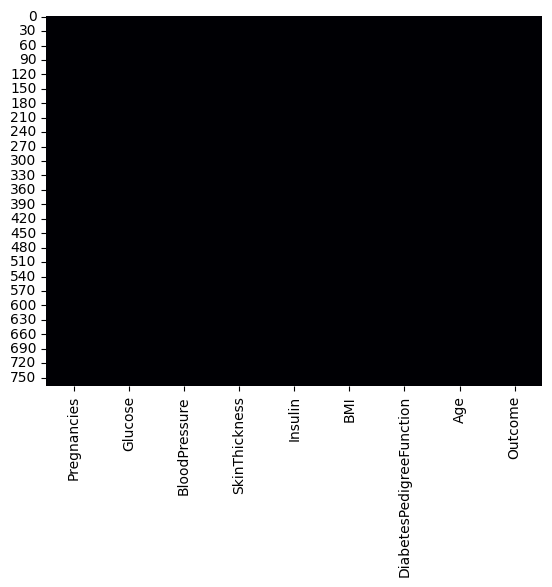

In [4]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False)
df.isnull().max().sum()

menurut hasil pengecekan `isnull` dapat dipastikan tidak ada data yang memiliki value null

pengecekan `isnull` bisa dilakukan dengan 2 cara yaitu dengan heatmap atau langsung memerikasa menggunakan dataframe


### 2.3. Statistik Deskriptif

memberikan gambaran tentang bentuk distribusi data.

In [5]:
# Menampilkan statistik deskriptif untuk setiap kolom numerik
print("Statistik Deskriptif:")
df.describe()

Statistik Deskriptif:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 2.4. Pengecekan Missing Values

Dari output `df.info()`, tampaknya tidak ada nilai null. Namun, dalam dataset ini, nilai nol pada beberapa kolom seperti Glucose, BloodPressure, SkinThickness, Insulin, dan BMI secara logis tidak mungkin dan sering kali digunakan untuk menandakan data yang hilang.

In [6]:
# Menghitung jumlah nilai nol di setiap kolom
print("Jumlah Nilai Nol di Setiap Kolom:")
print((df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum())

Jumlah Nilai Nol di Setiap Kolom:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


Terlihat ada sejumlah besar nilai nol pada kolom-kolom kritis yang seharusnya tidak bernilai nol. Nilai-nilai ini harus ditangani sebagai data yang hilang.

### 2.5. Distribusi Kelas Target

Melihat distribusi variabel target (`Outcome`) untuk mengetahui apakah dataset seimbang atau tidak.

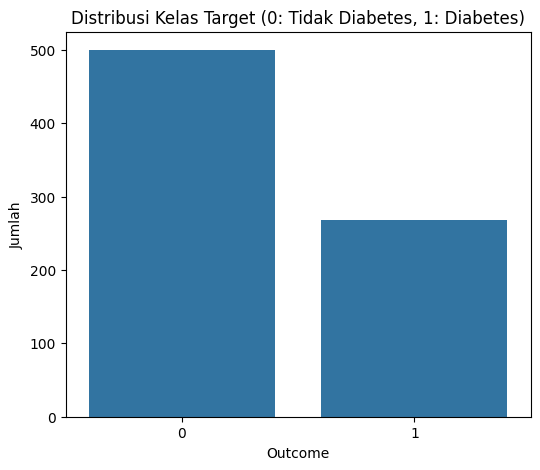

In [7]:
# Visualisasi distribusi kelas target
plt.figure(figsize=(6, 5))
sns.countplot(x='Outcome', data=df)
plt.title('Distribusi Kelas Target (0: Tidak Diabetes, 1: Diabetes)')
plt.xlabel('Outcome')
plt.ylabel('Jumlah')
plt.show()

Dataset ini tidak seimbang, di mana jumlah pasien yang tidak didiagnosis menderita diabetes (`Outcome=0`) secara signifikan lebih banyak daripada yang didiagnosis menderita diabetes (`Outcome=1`).

## 3. Pra-pemrosesan Data (Data Preprocessing)

### 3.1. Menangani Nilai Nol

mengganti nilai nol pada kolom `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, dan `BMI` dengan nilai median dari masing-masing kolom. Median dipilih karena lebih tahan terhadap outlier dibandingkan dengan mean.

In [8]:
# Kolom yang akan diimputasi
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Mengganti nilai 0 dengan NaN untuk kolom yang dipilih
for col in cols_to_impute:
    df[col] = df[col].replace(0, np.nan)

# Mengisi nilai NaN dengan median dari masing-masing kolom
for col in cols_to_impute:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# Memverifikasi bahwa tidak ada lagi nilai 0 pada kolom yang telah diimputasi
print("Jumlah Nilai 0 / NaN Setelah Ditangani:")
(df[cols_to_impute].isnull().sum())

Jumlah Nilai 0 / NaN Setelah Ditangani:


,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0


### 3.2. Pemisahan Fitur

memisahkan dataset menjadi fitur (variabel independen, X) dan target (variabel dependen, y).

In [9]:
# Memisahkan fitur (X) dan target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

### 3.3. Fitur Scaling

Banyak algoritma ML (seperti `Logistic Regression` dan `SVM`) bekerja lebih baik ketika fitur-fitur numerik berada pada skala yang sama. pada sistem akan menggunakan `StandardScaler` untuk melakukan standardisasi.

In [10]:
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan scaling pada fitur X
X_scaled = scaler.fit_transform(X)

# Mengubah hasil scaling kembali ke DataFrame untuk kemudahan pembacaan
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Lima Baris Pertama Data Setelah Scaling:")
print(X_scaled.head())

Lima Baris Pertama Data Setelah Scaling:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.670643 -0.181541  0.166619   
1    -0.844885 -1.205066      -0.528319      -0.012301 -0.181541 -0.852200   
2     1.233880  2.016662      -0.693761      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.073567      -0.528319      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.504422      -2.679076       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496  


### 3.4. Pembagian Data

data dibagi menjadi set pelatihan (`80%`) dan set pengujian (`20%`) untuk melatih dan mengevaluasi model secara objektif.

In [11]:
# Membagi data menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Ukuran Data Latih (X_train): {X_train.shape}")
print(f"Ukuran Data Uji (X_test): {X_test.shape}")
print(f"Ukuran Target Latih (y_train): {y_train.shape}")
print(f"Ukuran Target Uji (y_test): {y_test.shape}")

Ukuran Data Latih (X_train): (614, 8)
Ukuran Data Uji (X_test): (154, 8)
Ukuran Target Latih (y_train): (614,)
Ukuran Target Uji (y_test): (154,)


## 4. Modeling & Training

melatih lima model klasifikasi yang berbeda menggunakan data latih yang telah diproses.

In [12]:
# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42, probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Melatih setiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"Model '{name}' telah dilatih.")

Model 'Logistic Regression' telah dilatih.
Model 'K-Nearest Neighbors' telah dilatih.
Model 'Support Vector Machine' telah dilatih.
Model 'Decision Tree' telah dilatih.
Model 'Random Forest' telah dilatih.


## 5. Evaluasi Model

Setelah melakukan pelatihan, maka data akan dievaluasi dari kinerja setiap model pada data uji menggunakan metrik klasifikasi.

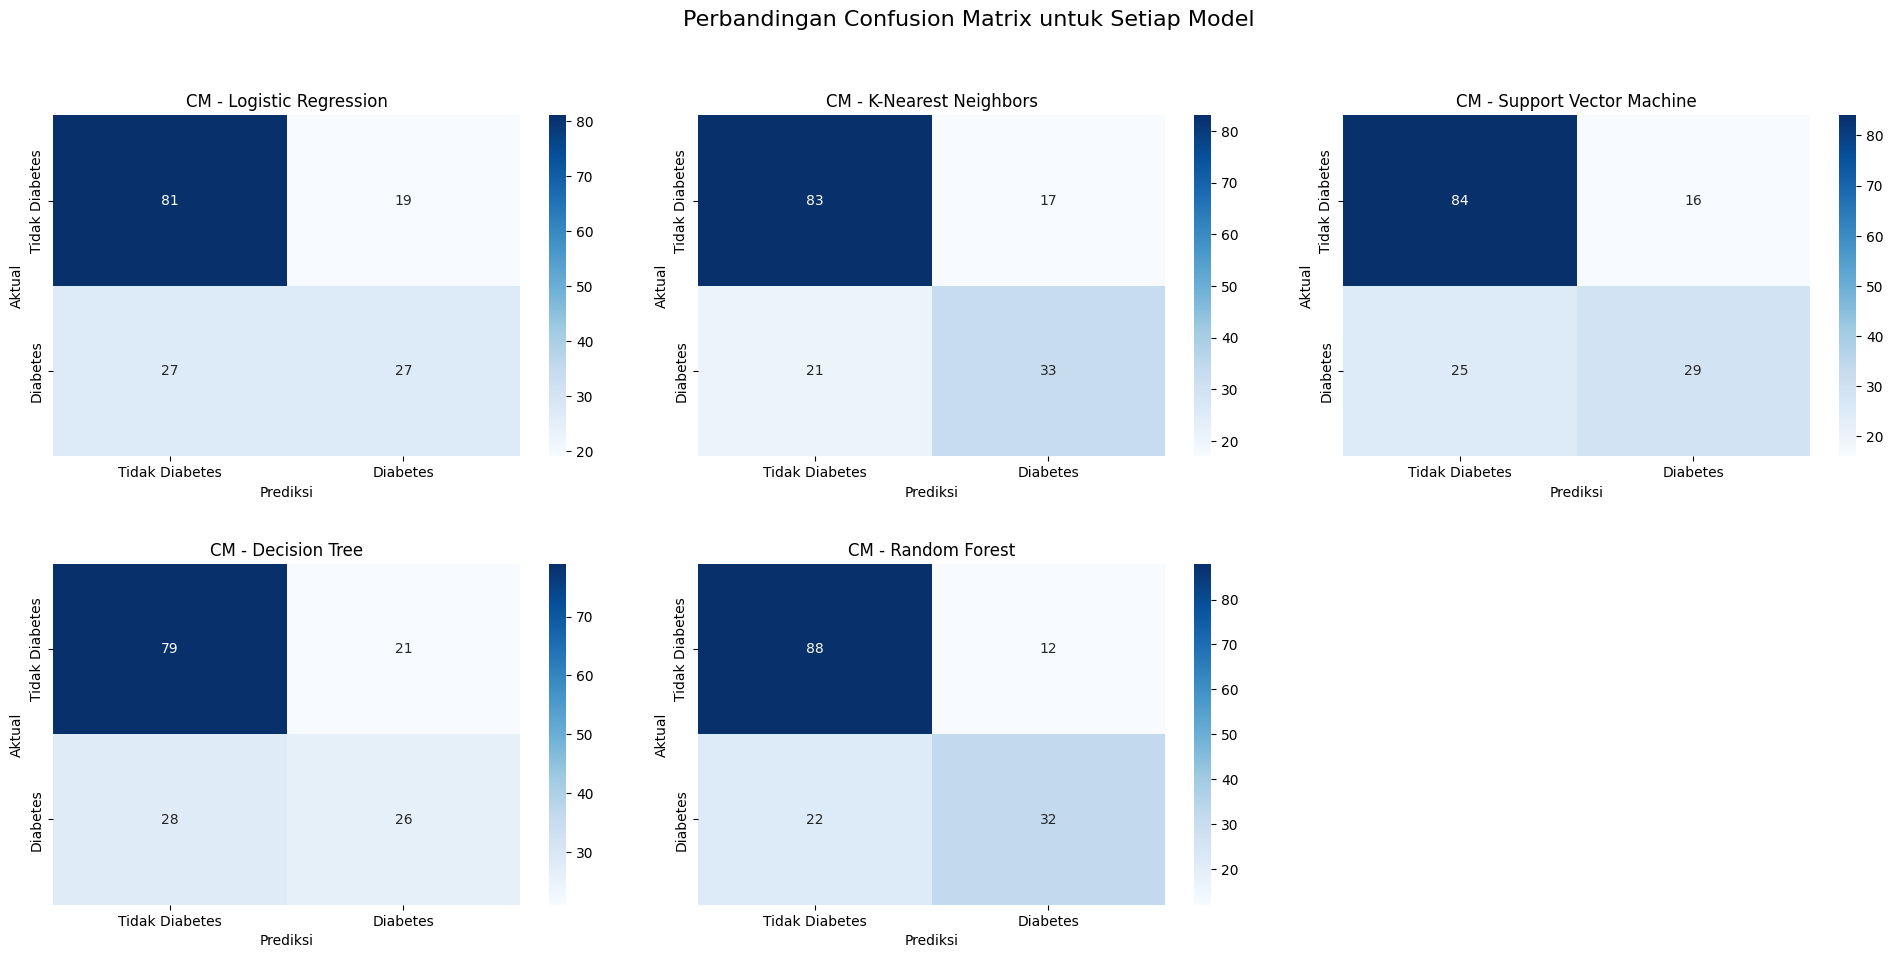

In [15]:
# Dictionary untuk menyimpan hasil evaluasi
results = {}

# Membuat grid subplot 2 baris x 3 kolom.
# figsize diatur agar keseluruhan gambar cukup besar.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Menambahkan judul utama untuk keseluruhan gambar
fig.suptitle('Perbandingan Confusion Matrix untuk Setiap Model', fontsize=16)

# Mengubah array axes 2D menjadi 1D agar mudah di-loop
axes = axes.flatten()

# Melakukan prediksi dan evaluasi untuk setiap model
for i, (name, model) in enumerate(models.items()):
    # Membuat prediksi pada data uji
    y_pred = model.predict(X_test)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Menyimpan hasil
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

# membuat confusion matrix pada subplot (axes) yang sesuai
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Tidak Diabetes', 'Diabetes'],
                yticklabels=['Tidak Diabetes', 'Diabetes'],
                ax=axes[i]) # subplot yang akan digunakan

    axes[i].set_title(f'CM - {name}')
    axes[i].set_xlabel('Prediksi')
    axes[i].set_ylabel('Aktual')

# Menyembunyikan subplot yang tidak terpakai (jika dihapus terdapat 6 plot)
for i in range(len(models), len(axes)):
    fig.delaxes(axes[i])

# Merapikan layout dan menampilkan gambar
plt.tight_layout(pad=3.0) # pad untuk memberi ruang bagi suptitle
plt.show()

# Mengubah hasil ke DataFrame untuk perbandingan yang mudah
results_df = pd.DataFrame(results).T

### 5.1. Perbandingan Kinerja Model

Menampilkan tabel yang membandingkan metrik evaluasi dari kelima model.

In [16]:
# Menampilkan DataFrame hasil evaluasi
print("Perbandingan Kinerja Model:")
print(results_df.sort_values(by='F1-Score', ascending=False))

Perbandingan Kinerja Model:
                        Accuracy  Precision    Recall  F1-Score
Random Forest           0.779221   0.727273  0.592593  0.653061
K-Nearest Neighbors     0.753247   0.660000  0.611111  0.634615
Support Vector Machine  0.733766   0.644444  0.537037  0.585859
Logistic Regression     0.701299   0.586957  0.500000  0.540000
Decision Tree           0.681818   0.553191  0.481481  0.514851


* **Akurasi (Accuracy)**: Persentase total prediksi yang benar.

* **Presisi (Precision)**: Dari semua pasien yang diprediksi diabetes, berapa persen yang benar-benar diabetes. Presisi tinggi penting untuk menghindari diagnosis positif palsu.

* **Recall (Sensitivity)**: Dari semua pasien yang sebenarnya diabetes, berapa persen yang berhasil diidentifikasi oleh model. Recall tinggi sangat krusial dalam skrining medis untuk meminimalkan kasus negatif palsu (tidak mendeteksi penyakit).

* **F1-Score**: Rata-rata dari presisi dan recall, memberikan skor tunggal yang menyeimbangkan keduanya.

## 6. Kesimpulan

Berdasarkan tabel perbandingan kinerja model, dapat ditarik beberapa kesimpulan mengenai model mana yang paling cocok untuk sistem skrining awal risiko diabetes.

Analisis Kinerja:
1.   **Model Terbaik Secara Keseluruhan**: **Random Forest** muncul sebagai model dengan kinerja paling unggul. Model ini tidak hanya memiliki **Akurasi tertinggi (77.9%)**, tetapi juga **Precision (72.7%)** dan **F1-Score (0.653)** yang tertinggi di antara kelima model.

2.   **Model dengan Kemampuan Deteksi Terbaik (Recall Tertinggi)**: **K-Nearest Neighbors (KNN)**, meskipun sedikit di bawah Random Forest secara keseluruhan, memiliki nilai **Recall tertinggi (61.1%)**.

3.   **Trade-Off antara Presisi dan Recall**:
  *   **Random Forest** lebih presisi. Ketika model ini memprediksi seseorang menderita diabetes, kemungkinan besar prediksi itu benar (presisi 72.7%)
  *   **KNN** lebih sensitif (recall tinggi). Model ini lebih baik dalam "menjaring" semua kasus diabetes yang sebenarnya, meskipun mungkin dengan risiko menghasilkan lebih banyak false alarm (presisi lebih rendah di 66%).





# 7. Implementasi Sistem Knowledge Base untuk Skrining

---

